In [ ]:
from src.goal_interpretation.goal_interpretation import run_baseline_model
from pprint import pprint
from tqdm import tqdm
import json, pathlib
from src.task_generation.task_generation import auto_find_tasks_from_eai

# Эксперимент с бейслайном: ручной ретрив нод и связей

eai_prompts_path = (pathlib.Path.cwd() / ".." / ".." / "output" 
                    / "virtualhome" / "generate_prompts" 
                    / "goal_interpretation" / "helm_prompt.json").resolve()
identifiers = auto_find_tasks_from_eai(eai_prompts_path)
outpath = (pathlib.Path.cwd() / ".." / ".." / "my_llm_outputs" / 
           "virtualhome" / "goal_interpretation" / "baseline_outputs.json").resolve()
output = []
for idtask in tqdm(identifiers, total = len(identifiers)):
    try:
        gr, _, _ = run_baseline_model(idtask, 10)
        output.append({'identifier' : idtask, 'llm_output' : json.dumps(gr, ensure_ascii=False), "errors" : ""})
    except Exception as e:
        output.append({'identifier' : idtask, 'llm_output' : "{'node_goals' : [], 'edge_goals' : [], 'action_goals' : []}", \
                       'errors' : str(e)})
with open(outpath, "w") as f:
    json.dump(output, f)

  0%|          | 0/342 [00:00<?, ?it/s]

100%|██████████| 342/342 [28:40<00:00,  5.03s/it]


In [ ]:
from src.goal_interpretation.goal_interpretation import run_rag_model
from pprint import pprint
from tqdm import tqdm
import json, pathlib
from src.task_generation.task_generation import auto_find_tasks_from_eai

# Эксперимент с графовым RAG, но без добавления possible_states объектов в контекст

eai_prompts_path = (pathlib.Path.cwd() / ".." / ".." / "output" 
                    / "virtualhome" / "generate_prompts" 
                    / "goal_interpretation" / "helm_prompt.json").resolve()
identifiers = auto_find_tasks_from_eai(eai_prompts_path)
outpath = (pathlib.Path.cwd() / ".." / ".." / "my_llm_outputs" / 
           "virtualhome" / "goal_interpretation" / "rag_outputs.json").resolve()
output = []
for idtask in tqdm(identifiers, total = len(identifiers)):
    try:
        gr, _, _ = run_rag_model(idtask, 10, use_possible_states=False)
        output.append({'identifier' : idtask, 'llm_output' : json.dumps(gr, ensure_ascii=False), "errors" : ""})
    except Exception as e:
        output.append({'identifier' : idtask, 'llm_output' : "{'node_goals' : [], 'edge_goals' : [], 'action_goals' : []}", \
                       'errors' : str(e)})
with open(outpath, "w") as f:
    json.dump(output, f)

100%|██████████| 342/342 [1:24:50<00:00, 14.89s/it]


In [1]:
from src.goal_interpretation.goal_interpretation import run_rag_model
from pprint import pprint
from tqdm import tqdm
import json, pathlib
from src.task_generation.task_generation import auto_find_tasks_from_eai

# наконец, эксперимент с графовым RAG + добавлением possible_states в граф

eai_prompts_path = (pathlib.Path.cwd() / ".." / ".." / "output" 
                    / "virtualhome" / "generate_prompts" 
                    / "goal_interpretation" / "helm_prompt.json").resolve()
identifiers = auto_find_tasks_from_eai(eai_prompts_path)
outpath = (pathlib.Path.cwd() / ".." / ".." / "my_llm_outputs" / 
           "virtualhome" / "goal_interpretation" / "rag_possible_states_outputs.json").resolve()
output = []
for idtask in tqdm(identifiers, total = len(identifiers)):
    try:
        gr, _, _ = run_rag_model(idtask, 10, use_possible_states=True)
        output.append({'identifier' : idtask, 'llm_output' : json.dumps(gr, ensure_ascii=False), "errors" : ""})
    except Exception as e:
        output.append({'identifier' : idtask, 'llm_output' : "{'node_goals' : [], 'edge_goals' : [], 'action_goals' : []}", \
                       'errors' : str(e)})
with open(outpath, "w") as f:
    json.dump(output, f)

100%|██████████| 342/342 [2:01:31<00:00, 21.32s/it]  


In [ ]:
from src.subgoal_decomposition.subgoal_decomposition import run_model
from pprint import pprint
from tqdm import tqdm
import json, pathlib
from src.task_generation.task_generation import auto_find_tasks_from_eai

# неудачный эксперимент: не совпадают id задач в списке датасета с теми id, которые указаны в generate_prompts subgoal_decomposition
# TODO: настроить subgoal_decomposition, чтобы он мог получать задачи только из набора примеров eai's subgoal_decomposition 
# (а не из пайплайна 
# eai's goal_interpretation ids -> my system prompt specification -> list of goals -> my system prompt specification -> subgoals graph)
eai_prompts_path = (pathlib.Path.cwd() / ".." / ".." / "output" 
                    / "virtualhome" / "generate_prompts" 
                    / "subgoal_decomposition" / "helm_prompt.json").resolve()

identifiers = auto_find_tasks_from_eai(eai_prompts_path)
outpath = (pathlib.Path.cwd() / ".." / ".." / "my_llm_outputs" / 
           "virtualhome" / "subgoal_decomposition" / "sd_outputs.json").resolve()
output = []
for idtask in tqdm(identifiers, total = len(identifiers)):

    try:
        gr, _, _ = run_model(idtask, 10)
        output.append({'identifier' : idtask, 'llm_output' : json.dumps(gr, ensure_ascii=False), 'errors' : ""})
    except Exception as e:
        output.append({'identifier' : idtask, 'llm_output' : \
                       "{'necessity_to_use_action' : 'no', 'actions_to_include' : [], 'output' : []}", \
                        'errors' : str(e)})


with open(outpath, "w") as f:
    json.dump(output, f)

  0%|          | 0/338 [00:00<?, ?it/s]


In [5]:
import matplotlib.pyplot as plt, seaborn as sns, pandas as pd
from pathlib import Path
%matplotlib inline

In [6]:
base_path = (Path.cwd() / ".." / ".." / "my_eai_results" 
                    / "virtualhome" / "evaluate_results" 
                    / "goal_interpretation").resolve()
baselife_file = base_path / "baseline" / "summary.json"
rag_file = base_path / "rag" / "summary.json"
rag_possible_states_file = base_path / "rag_possible_states" / "summary.json"
sota_file = (Path.cwd() / ".." / ".." / "output" / "virtualhome" / 
             "evaluate_results" / "goal_interpretation" / "gemini-1.5-pro-preview-0409" / "summary.json").resolve()

In [7]:
with open(baselife_file, "r", encoding='utf-8') as f:
    baseline_metrics = json.load(f)
with open(rag_file, "r", encoding='utf-8') as f:
    rag_metrics = json.load(f)
with open(rag_possible_states_file, "r", encoding='utf-8') as f:
    rag_possible_states_metrics = json.load(f)    
with open(sota_file, "r", encoding='utf-8') as f:
    sota_metrics = json.load(f)  

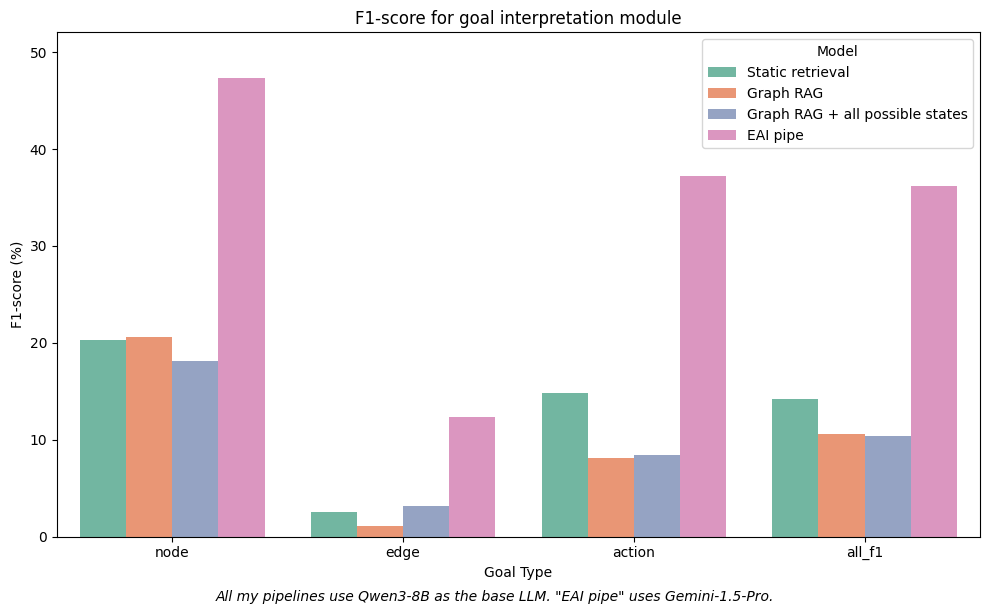

In [8]:
models = ['Static retrieval', 'Graph RAG', 'Graph RAG + all possible states', 'EAI pipe']
data = {
    'model': models * 4,
    'metric_type': ['node'] * 4 + ['edge'] * 4 + ['action'] * 4 + ['all_f1'] * 4,
    'f1': [
        baseline_metrics["node_f1"], rag_metrics["node_f1"], rag_possible_states_metrics["node_f1"], sota_metrics["node_f1"], # node_f1
        baseline_metrics["edge_f1"], rag_metrics["edge_f1"], rag_possible_states_metrics["edge_f1"], sota_metrics["edge_f1"], # edge_f1
        baseline_metrics["action_f1"], rag_metrics["action_f1"], rag_possible_states_metrics["action_f1"], sota_metrics["action_f1"], # action_f1
        baseline_metrics["all_f1"], rag_metrics["all_f1"], rag_possible_states_metrics["all_f1"], sota_metrics["all_f1"], # action_f1
    ]
}

df = pd.DataFrame(data)

# Построение
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='metric_type', y='f1', hue='model', palette='Set2')
plt.title('F1-score for goal interpretation module')
plt.ylabel('F1-score (%)')
plt.xlabel('Goal Type')
plt.legend(title='Model')
plt.ylim(0, max(df['f1']) * 1.1)
plt.tight_layout()
plt.figtext(0.5, -0.01, 
            'All my pipelines use Qwen3-8B as the base LLM. "EAI pipe" uses Gemini-1.5-Pro.', 
            ha='center', fontsize=10, style='italic')
plt.show()

In [9]:
data = {
    'model': models,
    'node_precision': [baseline_metrics["node_precision"], rag_metrics["node_precision"], rag_possible_states_metrics["node_precision"], sota_metrics["node_precision"]],
    'node_recall':    [baseline_metrics["node_recall"], rag_metrics["node_recall"], rag_possible_states_metrics["node_recall"], sota_metrics["node_recall"]],
    'node_f1':        [baseline_metrics["node_f1"], rag_metrics["node_f1"], rag_possible_states_metrics["node_f1"], sota_metrics["node_f1"]],
    'edge_precision': [baseline_metrics["edge_precision"], rag_metrics["edge_precision"], rag_possible_states_metrics["edge_precision"], sota_metrics["edge_precision"]],
    'edge_recall':    [baseline_metrics["edge_recall"], rag_metrics["edge_recall"], rag_possible_states_metrics["edge_recall"], sota_metrics["edge_recall"]],
    'edge_f1':        [baseline_metrics["edge_f1"], rag_metrics["edge_f1"], rag_possible_states_metrics["edge_f1"], sota_metrics["edge_f1"]],
    'action_precision': [baseline_metrics["action_precision"], rag_metrics["action_precision"], rag_possible_states_metrics["action_precision"], sota_metrics["action_precision"]],
    'action_recall':    [baseline_metrics["action_recall"], rag_metrics["action_recall"], rag_possible_states_metrics["action_recall"], sota_metrics["action_recall"]],
    'action_f1':        [baseline_metrics["action_f1"], rag_metrics["action_f1"], rag_possible_states_metrics["action_f1"], sota_metrics["action_f1"]],
}

df = pd.DataFrame(data)

# Преобразуем в "длинный" формат для heatmap
df_long = df.melt(id_vars='model', var_name='metric_full', value_name='score')

# Разделяем 'metric_full' на тип и метрику
df_long[['target', 'metric']] = df_long['metric_full'].str.split('_', expand=True)

# Создаём комбинированный столбец для столбцов heatmap
df_long['combined_metric'] = df_long['target'] + '_' + df_long['metric'].str[0].str.upper()  # node_P, node_R, node_F

# Сводим в матрицу: строки = модели, столбцы = комбинированные метрики
heatmap_data = df_long.pivot(index='model', columns='combined_metric', values='score')

# Сортируем столбцы в логическом порядке: node, edge, action → P, R, F
col_order = []
for target in ['node', 'edge', 'action']:
    for m in ['P', 'R', 'F']:
        col = f"{target}_{m}"
        if col in heatmap_data.columns:
            col_order.append(col)
heatmap_data = heatmap_data[col_order]

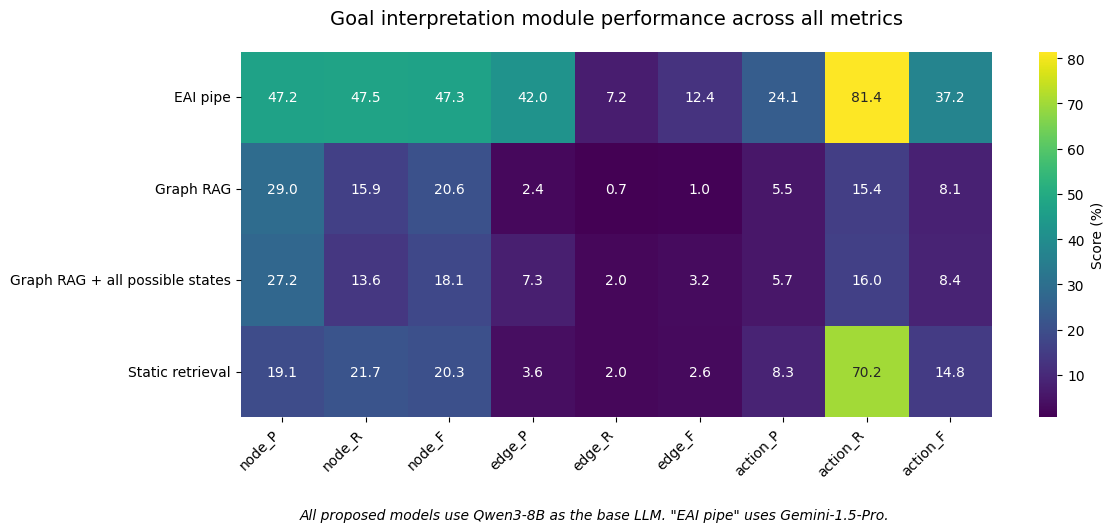

In [10]:
plt.figure(figsize=(12, 5))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="viridis",  # или "Blues", "rocket", "magma"
    cbar_kws={'label': 'Score (%)'}
)

plt.title('Goal interpretation module performance across all metrics', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('')

plt.figtext(0.5, -0.05,
            'All proposed models use Qwen3-8B as the base LLM. "EAI pipe" uses Gemini-1.5-Pro.',
            ha='center', fontsize=10, style='italic')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Артемий\AppData\Local\Temp\ipykernel_33428\1590657647.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


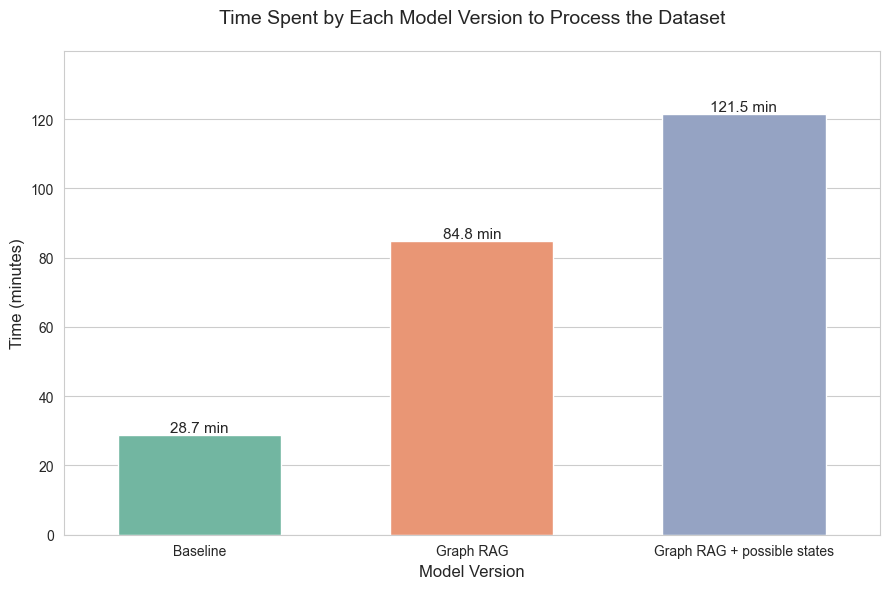

In [19]:
time = [
    28 + 40 / 60,
    1 * 60 + 24 + 50 / 60,
    2 * 60 + 1 + 31 / 60,
]

models = ["Baseline", "Graph RAG", "Graph RAG + possible states"]

# Создаём датафрейм
df = pd.DataFrame({
    'model': models,
    'time_min': time
})

sns.set_style("whitegrid")
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=df,
    x='model',
    y='time_min',
    palette='Set2',
    width=0.6
)

plt.title('Time Spent by Each Model Version to Process the Dataset', fontsize=14, pad=20)
plt.ylabel('Time (minutes)', fontsize=12)
plt.xlabel('Model Version', fontsize=12)
plt.ylim(0, max(df['time_min']) * 1.15)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f} min",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='medium')
plt.tight_layout()
plt.show()